# 决策树


## 决策树的构造
原理：你是否玩过海龟汤的游戏，游戏的规则很简单：参与游戏的一方在脑海里想某个事物，其他参与者向他提问题，只允许提20个问题，问题的答案也只能用错或者对来回答。问问题的人通过推断分解，逐步缩小待猜测事物的范围。决策树的工作原理与海龟汤游戏相似，用户输入一系列数据，然后给出游戏的答案。  
优点：计算复杂度不高，输出结果利于理解，对中间值的缺失不敏感，可以处理不相关特征数据。  
缺点：可能会产生过度匹配的问题。  
适用数据类型：数值型和标称型  

如何划分数据子集的算法与划分原始数据集的方法相同，直到所有具有相同类型的数据均在一个数据子集内。  
创建分支的伪代码函数creareBranch*():  
If so return 类标签;    
Else    
      寻找划分数据集的最好特征    
      划分数据集  
      创建分支节点  
         for 每个划分的子集  
              调用函数creareBranch并增加返回结果到分支节点中  
      return 分支节点    
上面的伪代码是一个递归函数，在倒数第二行直接调用了自己。后面我们将把上面的伪代码转化为Python代码，这里我们需要进一步去了解算法是如何划分数据集的。    
决策树的一般流程：  
1. 收集数据： 可以使用任何方法。
2. 准备数据： 树构造算法只适用于标称型数据，因此数值型数据必须离散化。
3. 分析数据： 可以使用任何方法，构建树完成之后，我们应该检查图形是否符合预期。
4. 训练算法： 构造树的数据结构。
5. 测试算法： 使用经验树来计算错误率。
6. 使用算法： 此步骤可以适用于任何监督学习算法，而使用决策树可以更好地理解数据的内在含义。

### 信息增益
划分数据集的大原则是：将无序的数据变得更加有序。在划分数据集之前之后发生的变化称为信息增益。知道如何计算信息增益，我们就可以计算每个特征值划分数据集获得的信息增益，获得信息增益最高的特征就是最好的选择。集合信息的度量方式成为香农熵或者简称为熵。

熵表示随机变量不确定性的度量。设X是一个取有限个值的随机离散变量，其概率分布为：  
$$P(X=x_i)=p_i \quad i =1,2,3...n$$
其中$p(x_i)$是选择该分类的概率。  
为了计算熵，我们需要计算所有类别所有可能值包含的信息期望值，通过下面的公式得到：
$$H=-\sum\limits_{i=1}^np(x_i)log_2p(x_i)$$
其中n是分类的数目。  

In [10]:
from math import log
import operator
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)       #返回数据集的行数
    labelCounts = {}                 #保存每个标签（Label）出现次数的字典
    for feaVec in dataSet:          #对每组特征量进行统计
        currentLabel = feaVec[-1]    #提取标签（Label）的信息
        if currentLabel not in labelCounts.keys():  #如果标签没有放入统计次数的字典，添加进去
            labelCounts[currentLabel] = 0          
        labelCounts[currentLabel] +=1           #Label计数
    shannonEnt = 0.0                           #经验熵
    for key in labelCounts:                        #选择该标签的概率
        prob = float(labelCounts[key])/numEntries  #利用公式计算
        shannonEnt -= prob * log(prob,2)
    return shannonEnt                        #返回香农熵

我们可以输入自己的creatDataSet()函数：

In [87]:
def createDataSet():
    dataSet = [[1,1,'yes'],[1,1,'yes'],[1,0,'no'],[0,1,'no'],[0,1,'no']]
    labels = ['no surfacing','flippers']
    return dataSet,labels

In [88]:
myDat,labels = createDataSet()
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [89]:
calcShannonEnt(myDat)

0.9709505944546686

In [90]:
myDat[0][-1] = 'maybe'

In [91]:
myDat

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [92]:
calcShannonEnt(myDat)

1.3709505944546687

熵越高，则混合的函数也越多，分类越多，熵也就越高。

### 划分数据集
对每一个特征划分数据集的结果计算一次信息熵，然后判断按照哪个特征划分数据集是最好的划分方式。  
按照给定特征划分数据集：

In [93]:
def splitDataSet(dataSet, axis, value): #待划分的数据集、划分数据集的特征、需要返回的特征的值
    retDataSet = [] #python在函数中传递的是列表引用，不能直接去修改原始的数据集，所以需要创建一个新的列表对象   
    for featVec in dataSet:     #在数据集里抽取符合特征的数据
        if featVec[axis] == value:               
            reducedFeatVec = featVec[:axis]             
            reducedFeatVec.extend(featVec[axis+1:]) #extend() 函数用于在列表末尾一次性追加另一个序列中的多个值（用新列表扩展原来的列表）
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [94]:
myDat,labels = createDataSet()

In [95]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [96]:
splitDataSet(myDat,0,1)

[[1, 'yes'], [1, 'yes'], [0, 'no']]

In [97]:
splitDataSet(myDat,0,0)

[[1, 'no'], [1, 'no']]

In [98]:
splitDataSet(myDat,2,'yes')

[[1, 1], [1, 1]]

接下来将遍历整个数据集，循环计算香农熵和splitDataSet（）函数，找到最好的特征划分方式。熵计算会告诉我们如何划分数据集是最好的数据组织方式。  
特征A对训练集D的信息增益g(D,A)，定义为集合D的经验熵H(D)与特征A给定条件下D的经验条件熵H(D|A)之差。
$$g(D,A)=H(D)-H(D|A)$$
经验熵H(D)表示对数据集D分类的不确定性。而经验熵H(D|A)表示在特征A给定条件下对数据集D分类的不确定性。根据信息增益准则的特征选择方法是：对训练集D，计算其每个特征的信息增益，并比较他们的大小，选择信息增益最大的特征。  
设训练数据集为D，|D|表示其样本容量，即样本个数。设有K个类$C_k，K=1,2,3,4...K$，$\mid C_k\mid $为属于类$C_k$的样本个数，$\sum\limits^K_{k=1}\mid  C_k\mid =\mid  D\mid $。设特征A有n个不同的取值$\{a_1,a_2,...a_n\}$,根据特征A的取值将D划分为n个子集$D_1,D_2,...,D_n$，$\mid  D_i \mid $为$D_i$的样本个数，$\sum\limits_{i=1}^n\mid  D_i\mid =\mid  D\mid $。记子集$D_i$中属于类$C_k$的样本集合为$D_{ik}$,$\mid  D_{ik}\mid $为$D_{ik}$的样本个数。于是信息增益的算法为：  
输入：训练数据集D和特征A；
输出：特征A对训练数据集D的信息增益g(D,A)  
1. 计算数据集D的经验熵H(D)
$$H(D)=-\sum_{k=1}^K\frac{\mid  C_k\mid }{\mid  D\mid }log_2\frac{\mid  C_k\mid }{\mid  D\mid }$$
2. 计算特征A对数据集D的经验条件熵H(D|A)
$$H(D|A)=\sum_{i=1}^n\frac{\mid  D_i\mid }{\mid D\mid }H(D_i)=-\sum_{i=1}^n\frac{\mid  D_i\mid }{\mid  D\mid }\sum_{k=1}^K\frac{\mid  D_{ki}\mid }{\mid  D_i\mid }log_2\frac{\mid  D_{ik}\mid }{\mid  D_i\mid }$$
3. 计算信息增益
$$g(D,A)=H(D)-H(D|A)$$

In [99]:
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) -1
    baseEntropy = calcShannonEnt(dataSet)   #计算数据集的经验熵
    bestInfoGain = 0.0; bestFeature = -1
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet] 
        #将dataSet中的数据先按行依次放入example中，然后取得example中的example[i]元素，放入列表featList中
        #对数据的遍历一般都是按行，这是取其列的方法
        uniqueVals = set(featList) #set() 函数创建一个无序不重复元素集，可进行关系测试，删除重复数据，还可以计算交集、差集、并集等                    
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value) #划分数据集
            prob = len(subDataSet)/float(len(dataSet))  #计算D_i/D
            newEntropy += prob*calcShannonEnt(subDataSet) #计算特征A对训练数据集的经验条件熵
        infoGain = baseEntropy - newEntropy  #计算信息增益
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain       #选出最大值
            bestFeature = i
    return bestFeature 

In [100]:
chooseBestFeatureToSplit(myDat)

0

In [101]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

### 递归构建决策树
得到原始数据集，然后基于最好的属性值划分数据集，由于特征值可能多于两个，因此可能存在大于两个分支的数据集划分。第一次划分之后，数据将被向下传递到树分支的下一个节点，在这个节点上，我们可以再次划分数据。因此我们可以采用递归的原则处理数据集。  
递归结束的条件是：程序遍历完所有划分数据集的属性，或者每个分之下的所有实例都具有相同的分类。如果所有实例具有相同的分类，则得到一个叶子节点或者终止块。任何到达叶子节点的数据必然属于叶子节点的分类。  

In [102]:
def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.key():classCount[vote] = 0 #如果字典中不含该标签的键，就新建标签键值并初始化为0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.iterms(), key = operator.itemgetter(1), reverse = True)
        #将items返回的可遍历键值对数组，根据键值对的第二个域(值)，进行降序排列
    return sortedClassCount[0][0] 

该函数使用分类名称的列表，然后创建键值为classList中唯一值的数据字典，字典对象存储了classList中每个类标签出现的频率，最后利用operator操作键值排序字典，并返回出现次数最多的分类名称。  
创建树的函数代码：

In [156]:
def createTree(dataSet,labels):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) == len(classList):
        #Python count() 方法用于统计字符串里某个字符出现的次数。可选参数为在字符串搜索的开始与结束位置。
        return classList[0]
        #递归函数的第一个停止条件是所有的类标签完全相同，则直接返回该类标签。
    if len(dataSet[0]) == 1:  #dataset中只剩下一列类别
        return majorityCnt(classList)  #遍历完所有特征时返回出现次数最多的
        #递归函数第二个停止条件是使用完了所有的特征，仍然不能将数据集划分成仅包含唯一类别的分组。
    bestFeat = chooseBestFeatureToSplit(dataSet) #计算出划分数据集的最优特征
    bestFeatLabel = labels[bestFeat]  #该特征属性作为节点的名字
    myTree = {bestFeatLabel:{}} #建立最优特征属性值为空
    del(labels[bestFeat])    #从标签中删除已经划分好的特征
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]    #得到列表包含的属性值
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
    return myTree

In [144]:
myDat,labels = createDataSet()

In [145]:
labels

['no surfacing', 'flippers']

In [146]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [147]:
myTree = createTree(myDat,labels)

In [148]:
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

## 在Python中使用Matplotlib注解绘制树形图

使用文本注解绘制树节点

In [225]:
import matplotlib.pyplot as plt
decisionNode = dict(boxstyle = "sawtooth", fc = "0.8")
leafNode = dict(boxstyle = "round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy = parentPt, xycoords = 'axes fraction', xytext = centerPt, \
    textcoords = 'axes fraction',va = "center", ha = "center", bbox = nodeType, arrowprops = arrow_args)

def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)    #no ticks
    #createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;
    plotTree(inTree, (0.5,1.0), '')
    plt.show()

In [226]:
import treePlotter

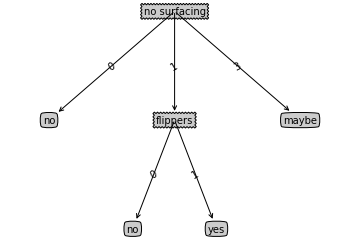

In [231]:
createPlot(myTree)

### 构造注解树
获取叶节点的数目和树的层数

In [232]:
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            numLeafs += getNumLeafs(secondDict [key])
        else: numLeafs +=1
    return numLeafs
def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            thisDepth =  1 + getTreeDepth(secondDict[key])
        else: thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth

In [233]:
getNumLeafs(myTree)

4

In [234]:
getTreeDepth(myTree)

2

绘制完整的树

In [235]:
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)
def plotTree(myTree, parentPt, nodeTxt):#if the first key tells you what feat was split on
    numLeafs = getNumLeafs(myTree)  #this determines the x width of this tree
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]     #the text label for this node should be this
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes   
            plotTree(secondDict[key],cntrPt,str(key))        #recursion
        else:   #it's a leaf node print the leaf node
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
#if you do get a dictonary you know it's a tree, and the first element will be another dict

In [236]:
def retrieveTree(i):
    listOfTrees =[{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                  {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
                  ]
    return listOfTrees[i]

In [242]:
myTree = treePlotter.retrieveTree(0)

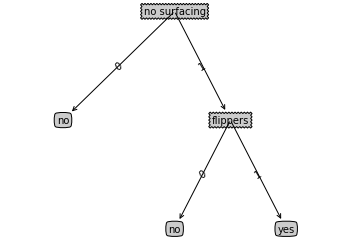

In [243]:
createPlot(myTree)

In [244]:
myTree['no surfacing'][3]='maybe'

In [245]:
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}, 3: 'maybe'}}

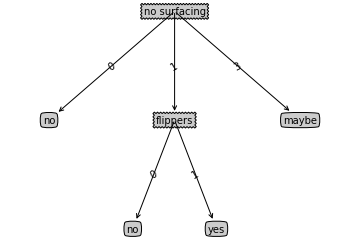

In [247]:
createPlot(myTree)

## 测试和存储分类器

### 测试算法：使用决策树执行分类
依靠训练数据构造了决策树之后，我们可以将它用于实际数据的分类。在执行数据分类时，需要决策树以及用于构造树的标签向量。然后，程序比较测试数据与决策树上的数值，递归执行该过程直到进入叶子节点；最后将测试数据定义为叶子节点所属的类型。  

In [253]:
def classify(inputTree, featLabels, testVec):
    firstStr = list(inputTree.keys())[0]   #，找到输入的第一个元素，即第一个节点
    secondDict = inputTree[firstStr]    
    featIndex = featLabels.index(firstStr) #如果包含子字符串返回开始的索引值，否则抛出异常
    for key in secondDict.keys():           
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__=='dict': #type(a).__name__ == 'dict' :可判断a的类型是否类型为dict
                classLabel = classify(secondDict[key], featLabels, testVec)
            else:  classLabel = secondDict[key]
    return classLabel

在存储带有特征的数据会面临一个问题：程序无法确定特征在数据集中的位置，例如前面例子的第一个用于划分数据集的特征是no surfacing属性，但是在实际数据集中该属性存储在哪个位置？是一个属性还是第二个属性？特征标签列表将帮助程序处理这个问题。使用index方法查找当前列表中第一个匹配firstStr变量的元素。然后代码递归遍历整棵树，比较textVec变量中的值与树节点的值，如果到达叶子节点，则返回当前节点的分类标签。  

In [254]:
mydat,labels=createDataSet()

In [255]:
labels

['no surfacing', 'flippers']

In [256]:
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}, 3: 'maybe'}}

In [257]:
classify(myTree, labels, [1,0])

'no'

In [258]:
classify(myTree, labels, [1,1])

'yes'

### 使用算法：决策树的存储
为了节省计算时间，最好能够在每次执行分类时调用已经构造好的决策树。需要使用Python模块序列化对象。序列化对象可以在磁盘上保存对象，并在需要的时候读取出来。任何对象都可以执行序列化操作，字典对象也不例外。  

In [262]:
def storeTree(inputTree,filename):
    import pickle
    fw = open(filename, 'w')
    pickle.dump(inputTree,fw)
    fw.close()
def grabTree(filename):
    import pickle
    fr = open(filename)
    return pickle.load(fr)

## 示例：使用决策树预测隐形眼镜类型
1. 收集数据：提供的文本文件。
2. 准备数据：解析tab键分隔的数据行。
3. 分析数据：快速检查数据，确保正确地解析数据内容，使用函数绘制最终的树形图。
4. 训练算法：使用createTree()函数。
5. 测试算法：编写测试函数验证决策树可以正确分类给定的数据实例。
6. 使用算法：存储树的数据结构，以便下次使用时无需再重新构造树。

In [263]:
fr = open('/home/liu/Documents/jupyter/machine/data/Ch03/lenses.txt')
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']

In [264]:
lensesTree = createTree(lenses,lensesLabels)

In [265]:
lensesTree

{'tearRate': {'normal': {'astigmatic': {'no': {'age': {'young': 'soft',
      'presbyopic': {'prescript': {'myope': 'no lenses', 'hyper': 'soft'}},
      'pre': 'soft'}},
    'yes': {'prescript': {'myope': 'hard',
      'hyper': {'age': {'young': 'hard',
        'presbyopic': 'no lenses',
        'pre': 'no lenses'}}}}}},
  'reduced': 'no lenses'}}

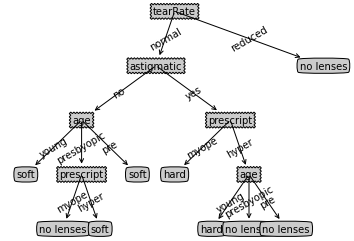

In [266]:
createPlot(lensesTree)

In [ ]:
ID3算法可以用于划分标称型数据集。